In [1]:
import yaml
import logging

In [3]:
# Initialize the logger once as the application starts up.
with open("../logging.yaml", 'rt') as f:
    config = yaml.safe_load(f.read())
    logging.config.dictConfig(config)
 
# Get an instance of the logger and use it to write a log!
# Note: Do this AFTER the config is loaded above or it won't use the config.
logger = logging.getLogger("py-clean-arch")
logger.info("Configured the logger for solid!")

2023-03-13 10:24:46,474 - py-clean-arch - INFO - Configured the logger for solid!


# about the SOLID principles

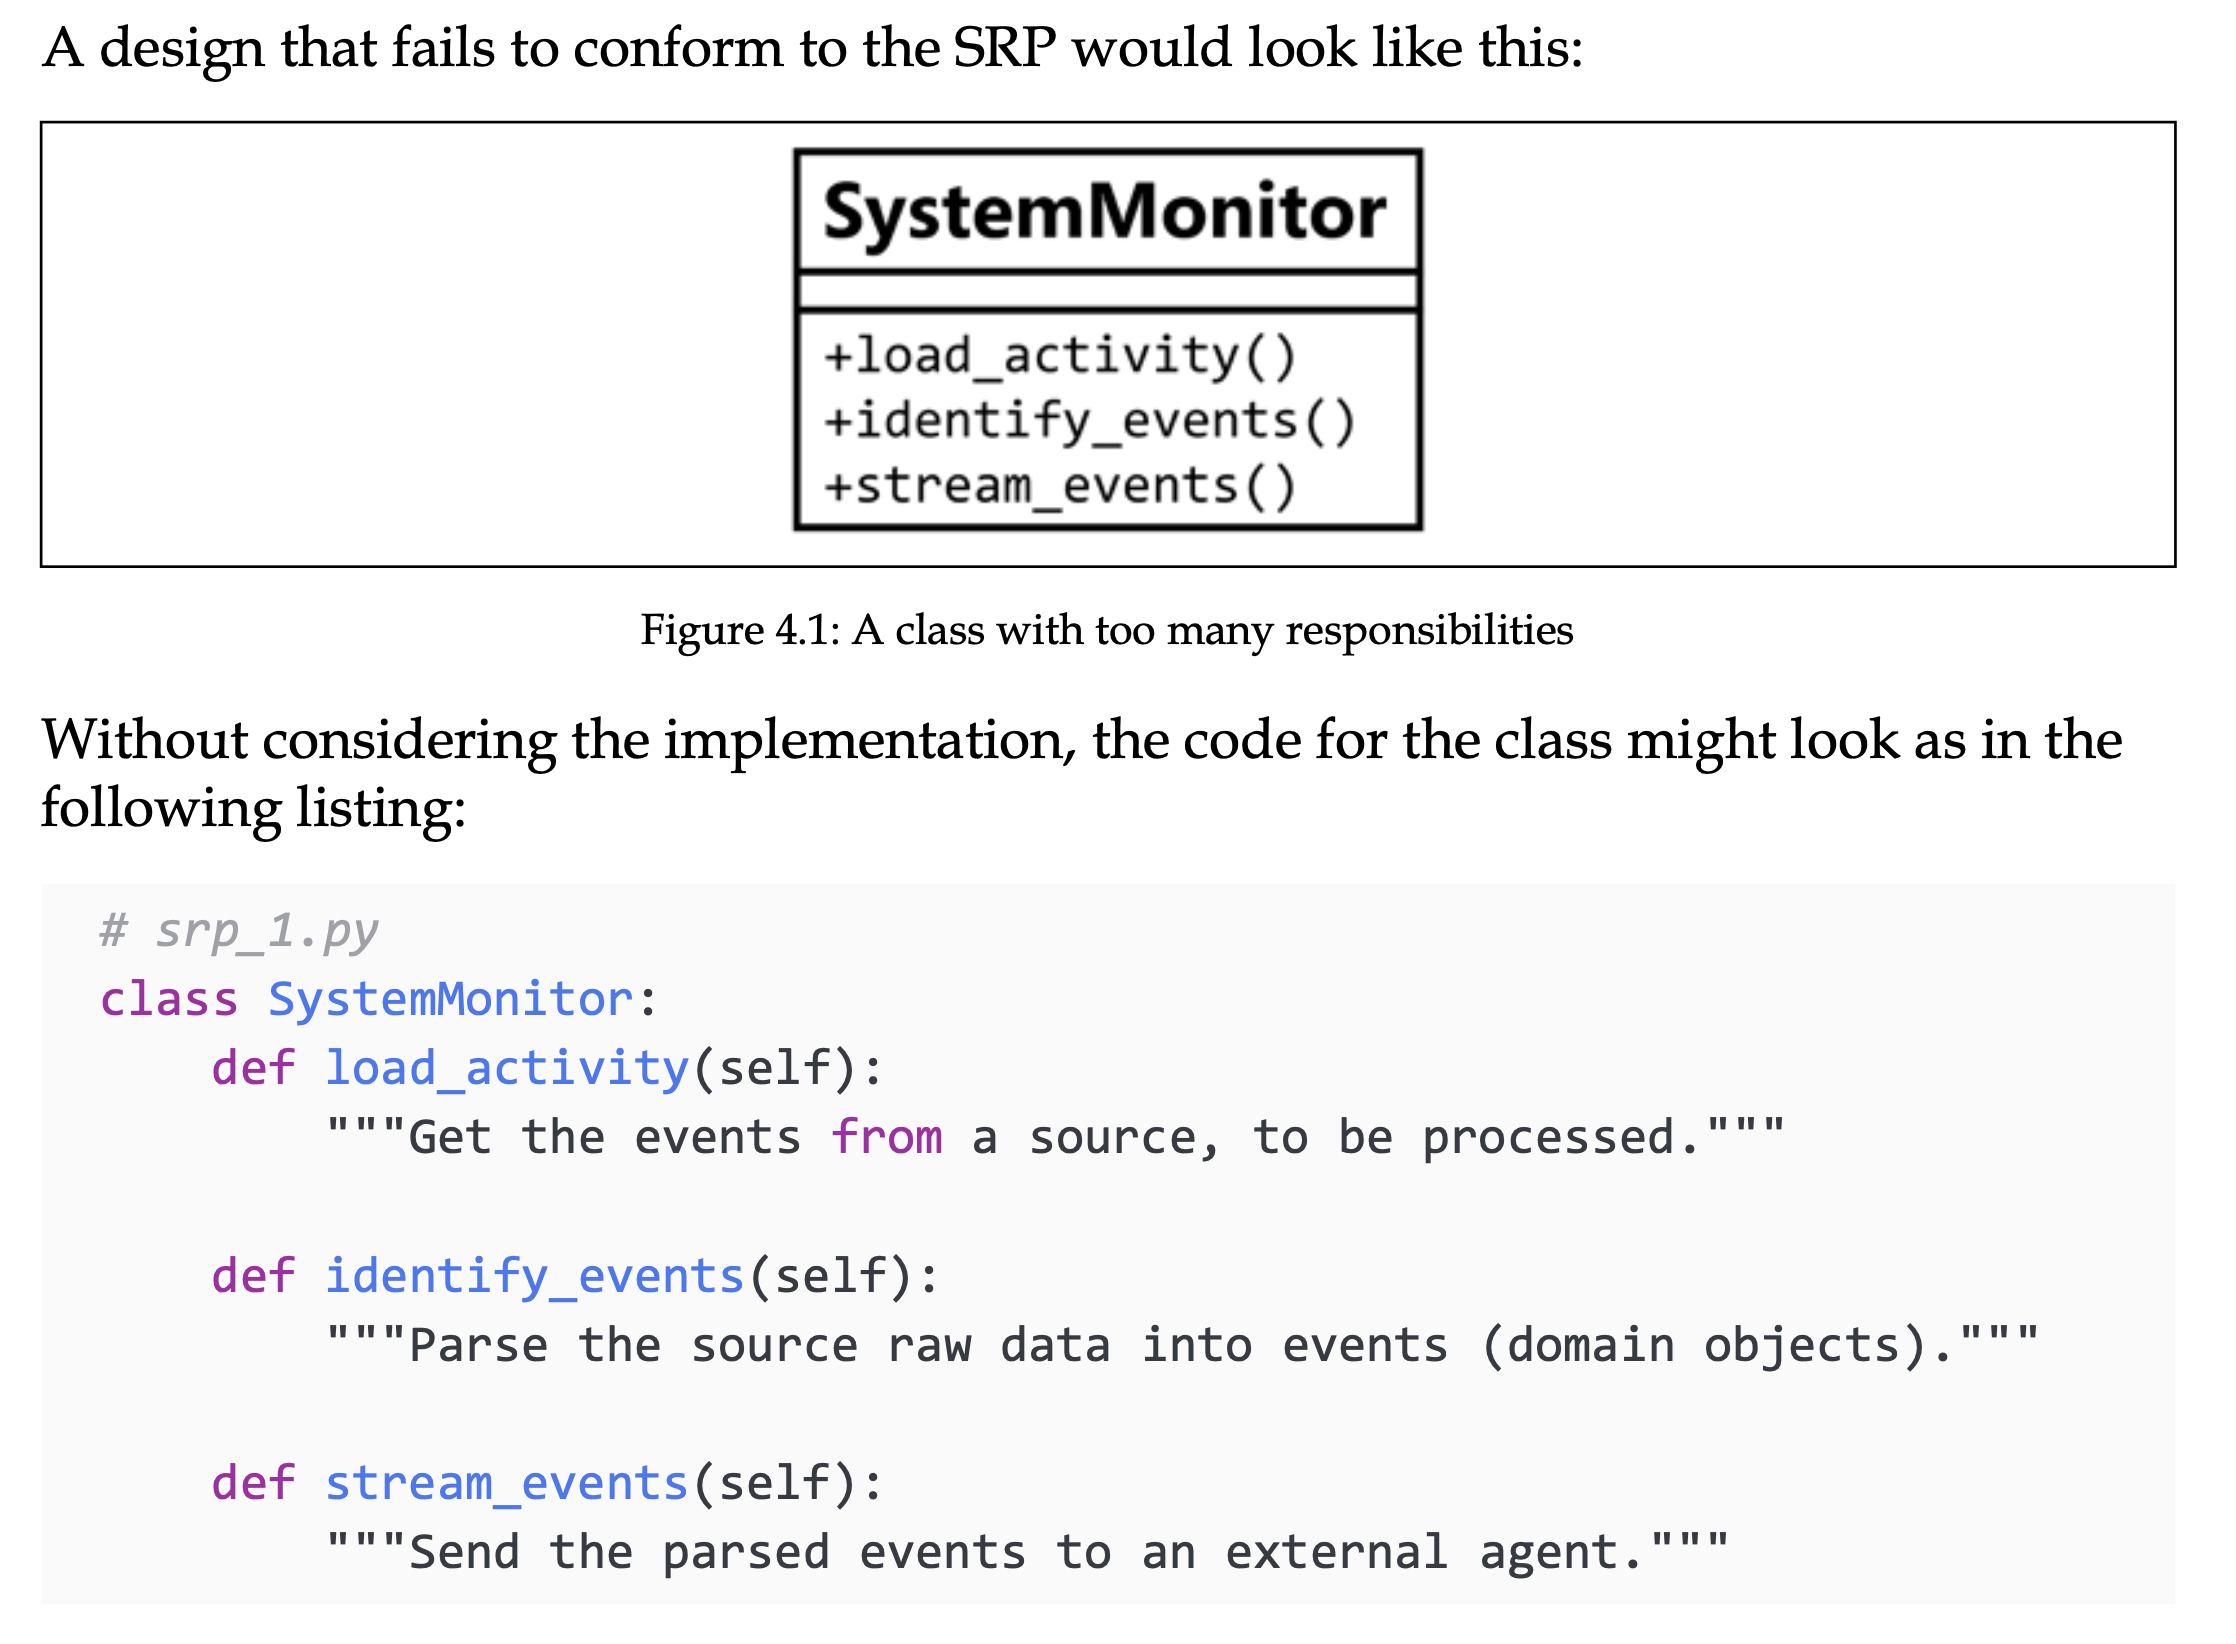

# the above class has to much responsibility
fixing it

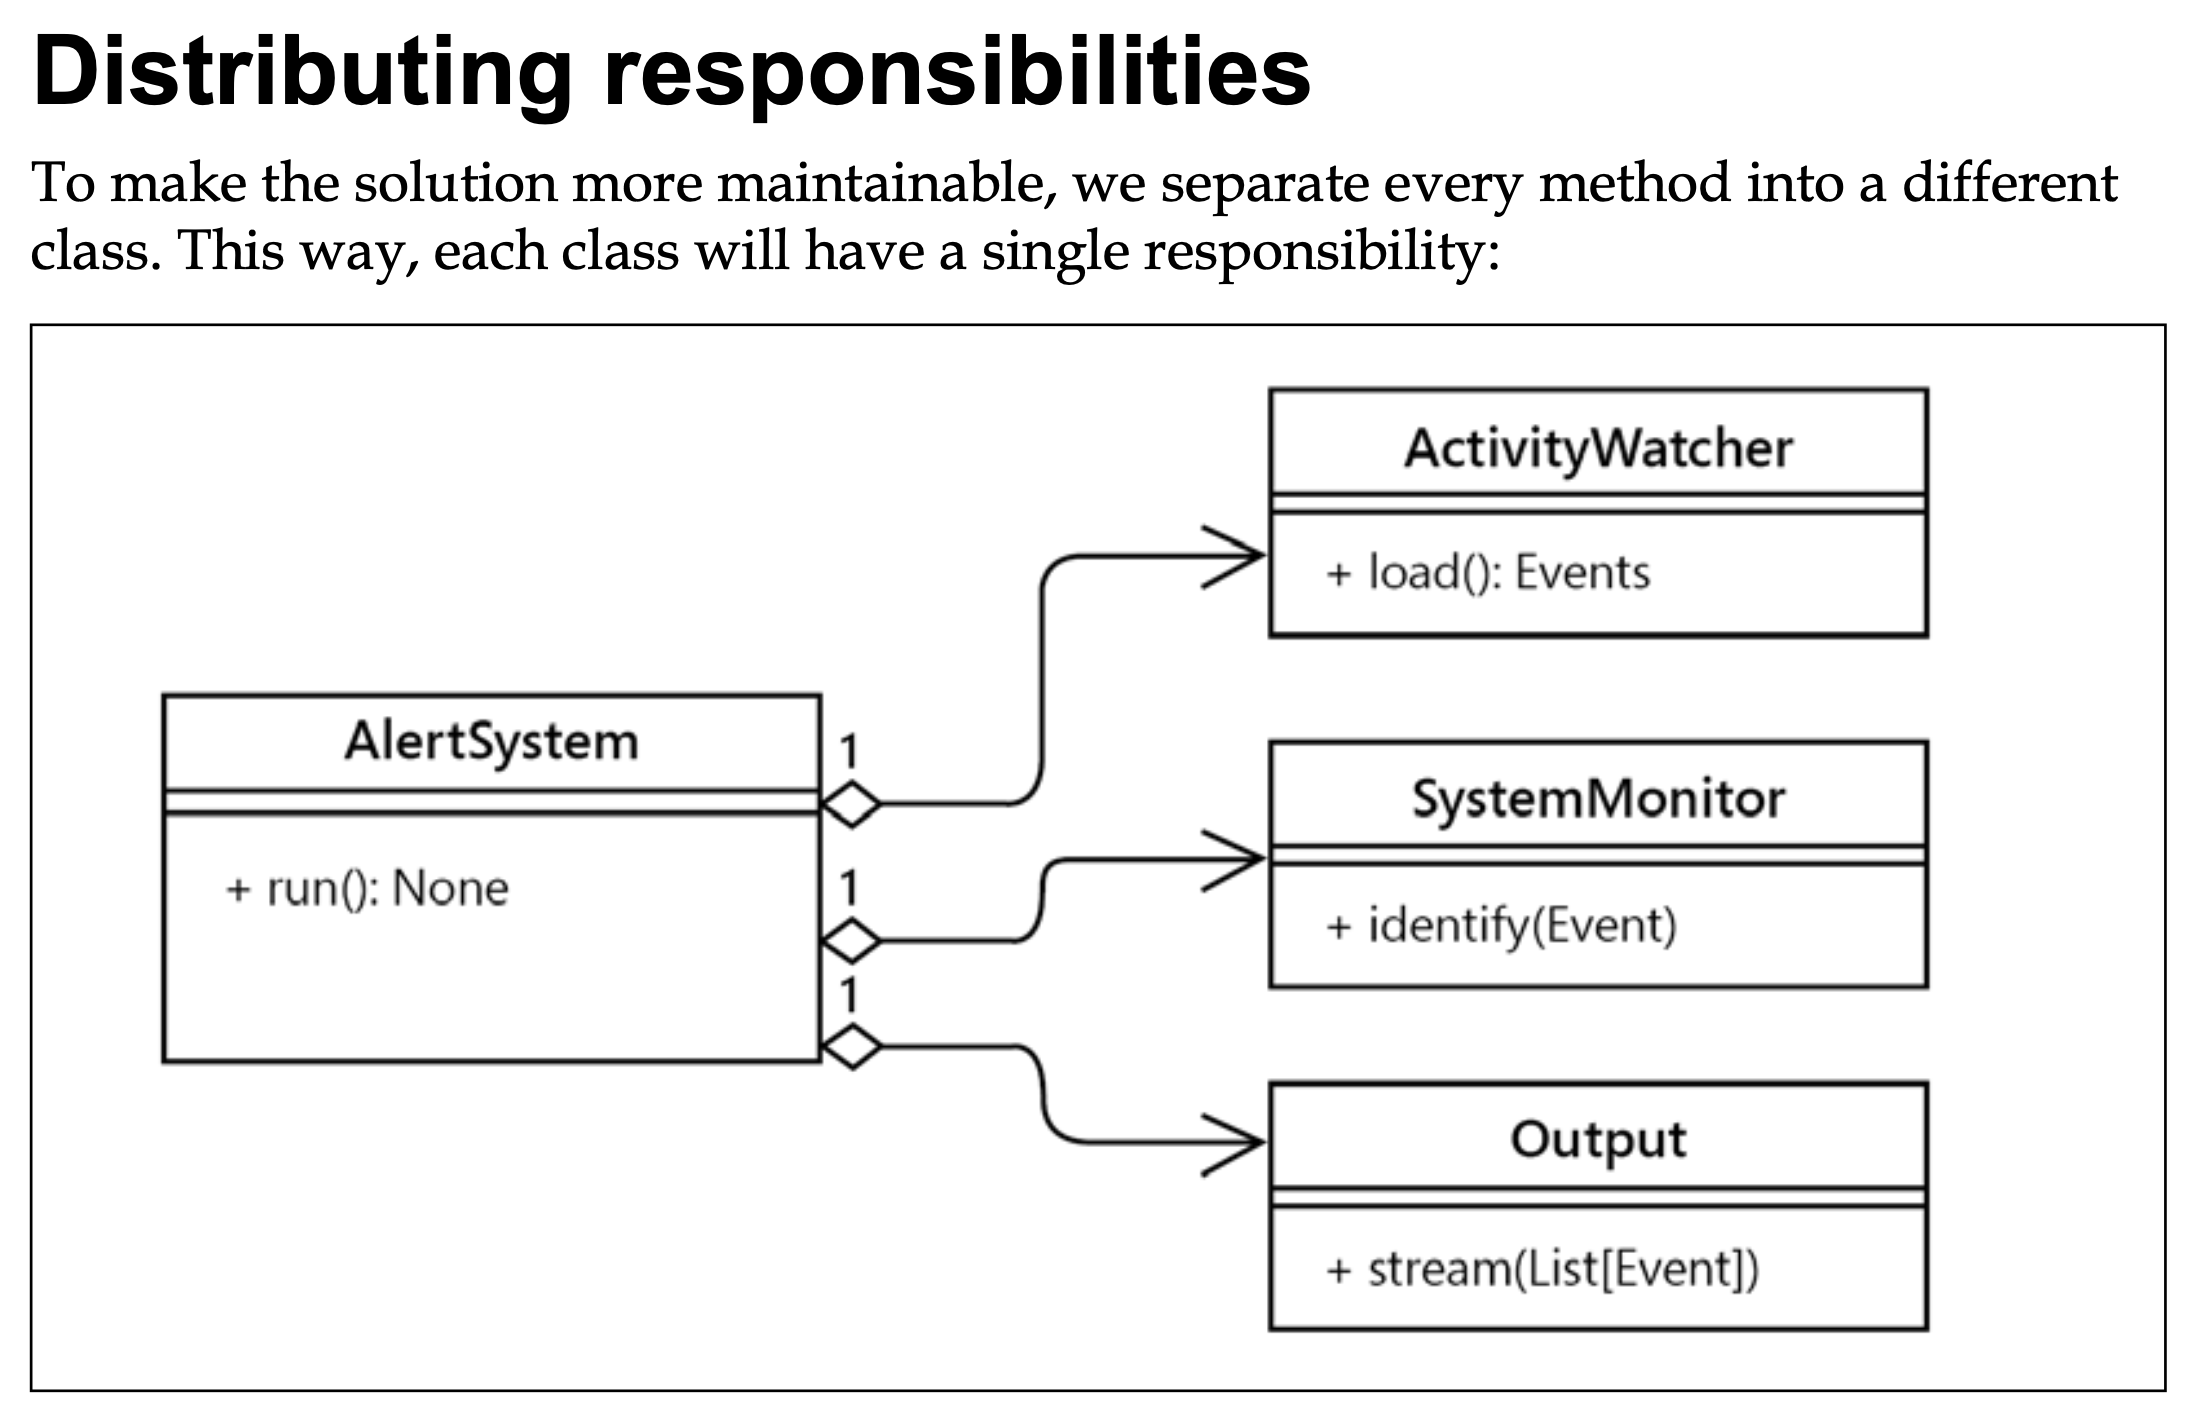

# about open close principle

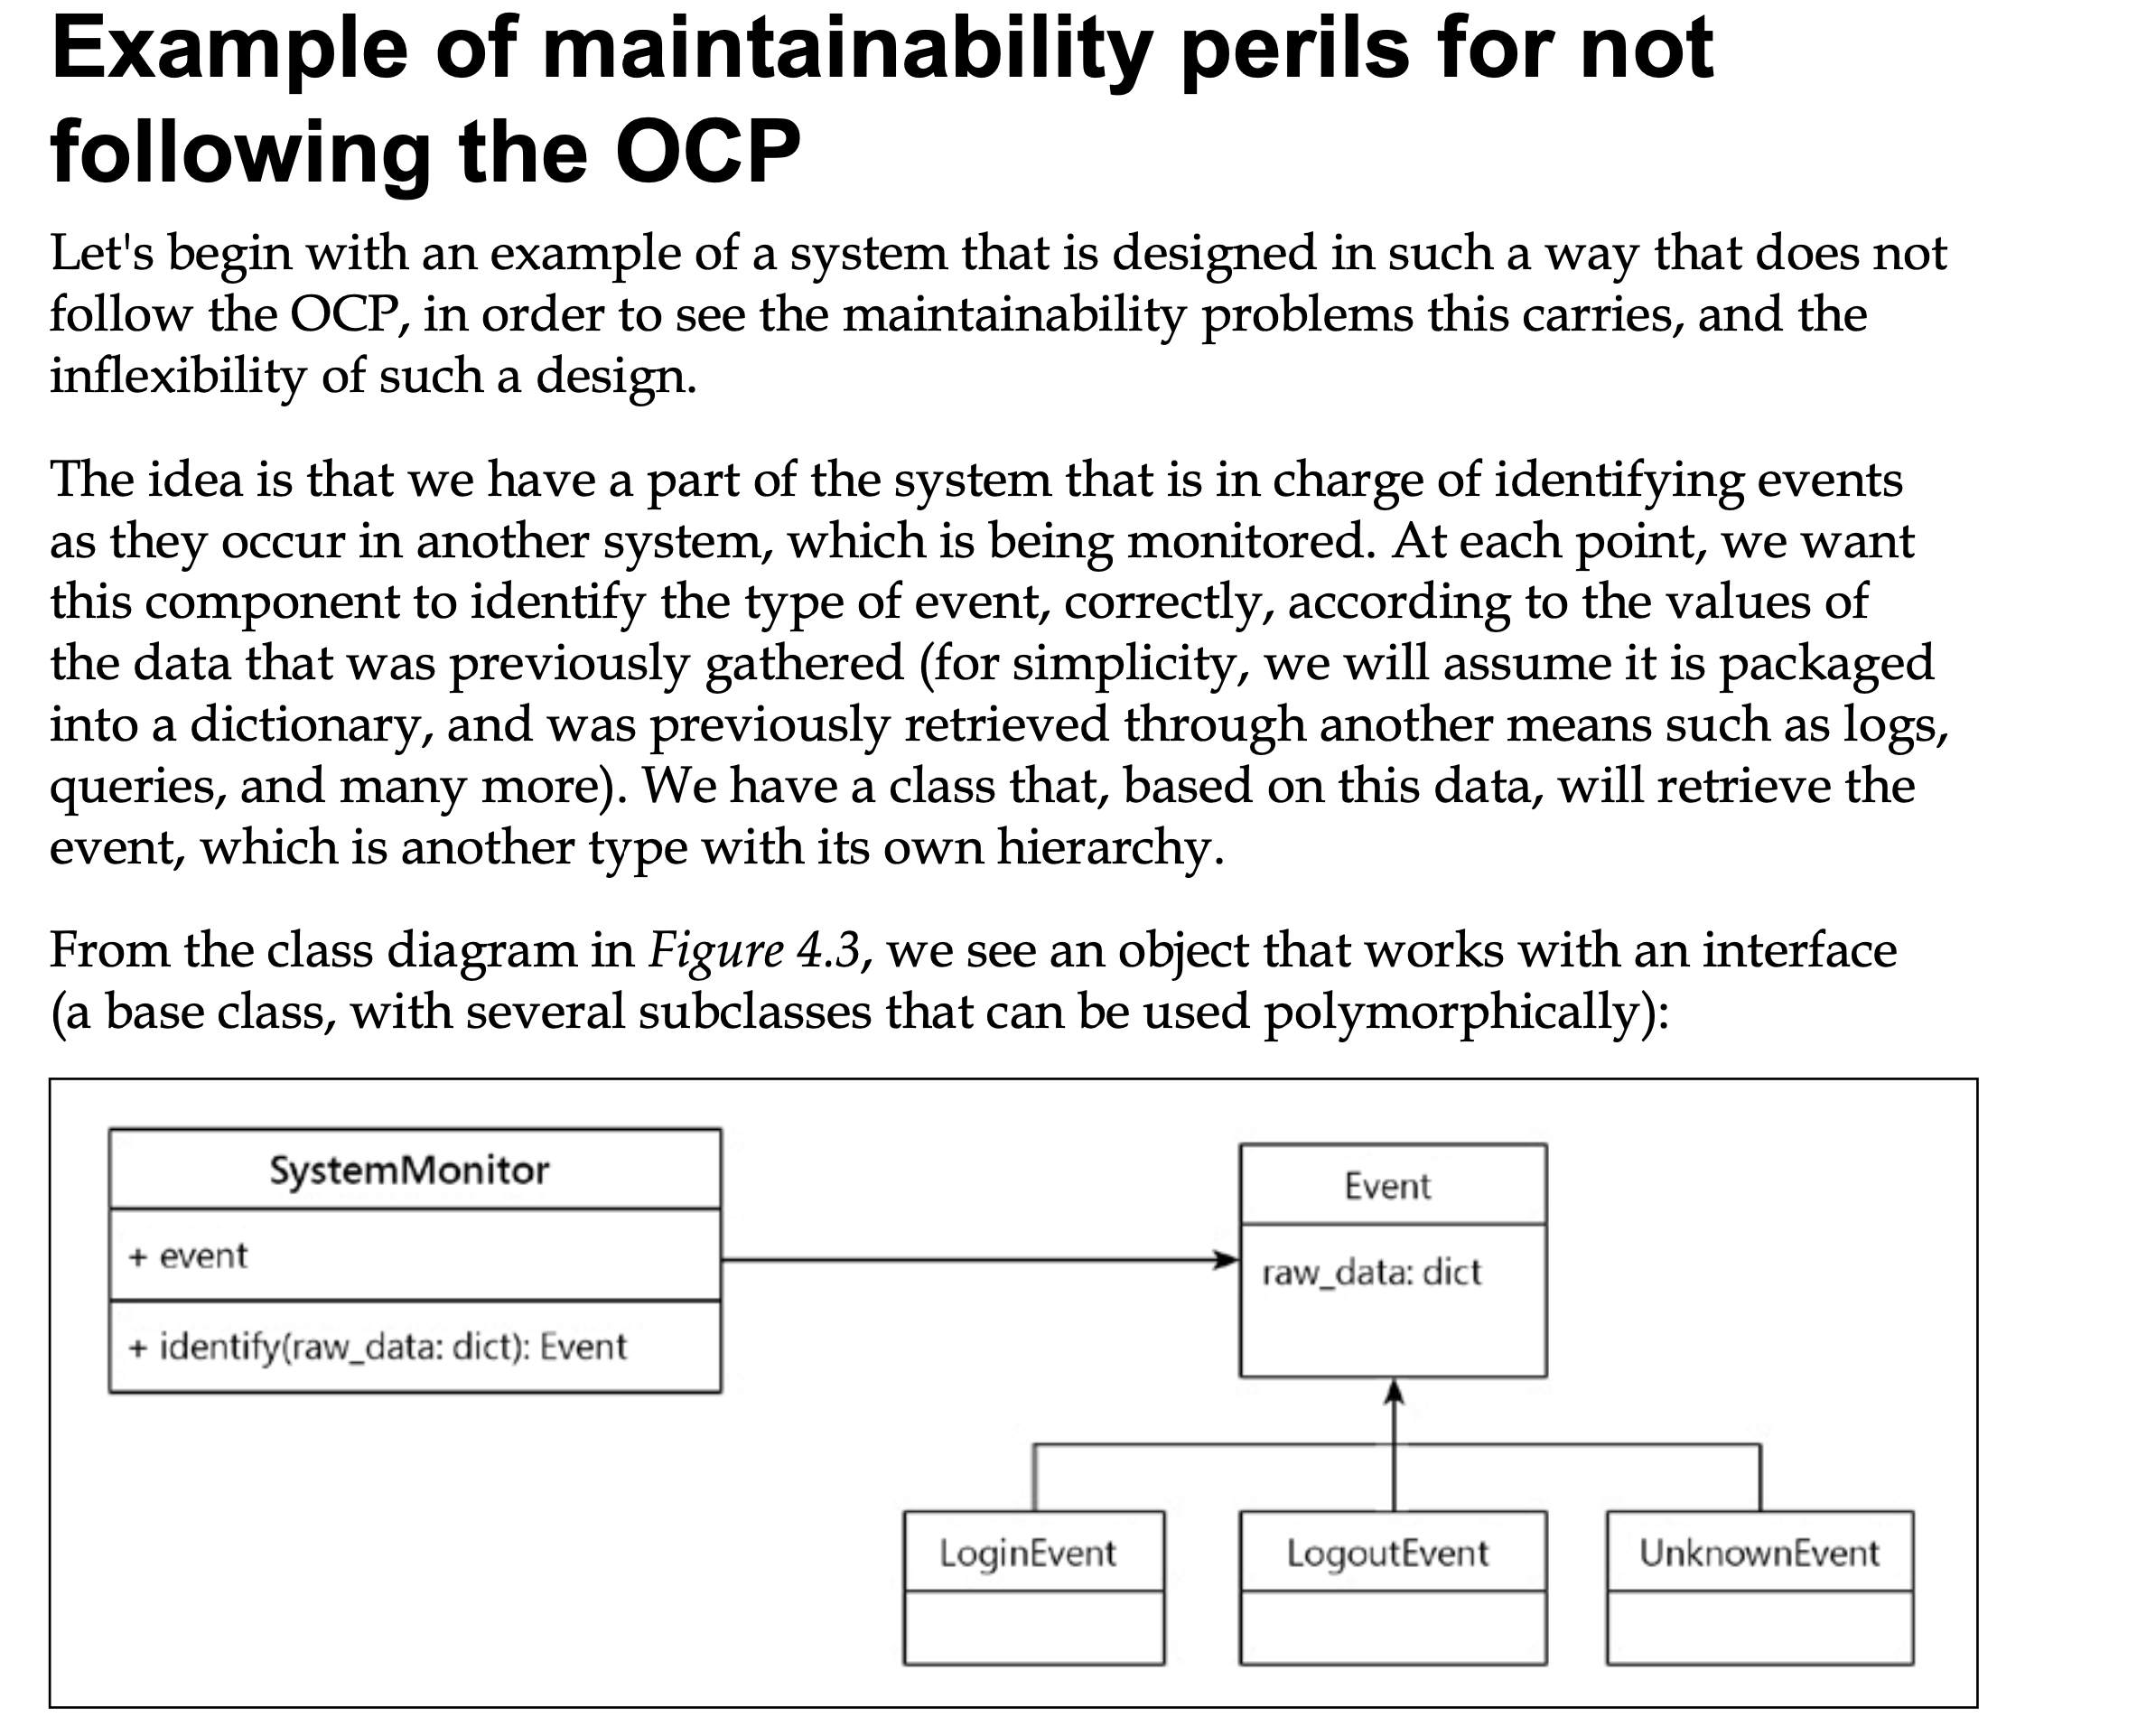

In [5]:
from dataclasses import dataclass

@dataclass
class Event:
    raw_data: dict
    
class UnknownEvent(Event):
    """A type of event that cannot be identified from its data."""

class LoginEvent(Event):
    """A event representing a user that has just entered the system."""
    
class LogoutEvent(Event):
    """An event representing a user that has just left the system."""


class SystemMonitor:
    """Identify events that occurred in the system."""
    def __init__(self, event_data):
        self.event_data = event_data
    def identify_event(self):
        if (
            self.event_data["before"]["session"] == 0
            and self.event_data["after"]["session"] == 1
        ):
            return LoginEvent(self.event_data)
        elif (
            self.event_data["before"]["session"] == 1
            and self.event_data["after"]["session"] == 0
        ):
            return LogoutEvent(self.event_data)
        return UnknownEvent(self.event_data)

In [6]:
l1 = SystemMonitor({"before": {"session": 0}, "after": {"session": 1}})

print(l1.identify_event().__class__.__name__)

l2 = SystemMonitor({"before": {"session": 1}, "after": {"session": 0}})
print(l2.identify_event().__class__.__name__)

l3 = SystemMonitor({"before": {"session": 1}, "after": {"session": 1}})
print(l3.identify_event().__class__.__name__)

LoginEvent
LogoutEvent
UnknownEvent


In [7]:
# the abot do no follow the OCP, we will need to rework system monitor class every time we need to change and event
# behaviour

In [8]:
# one way to fix above

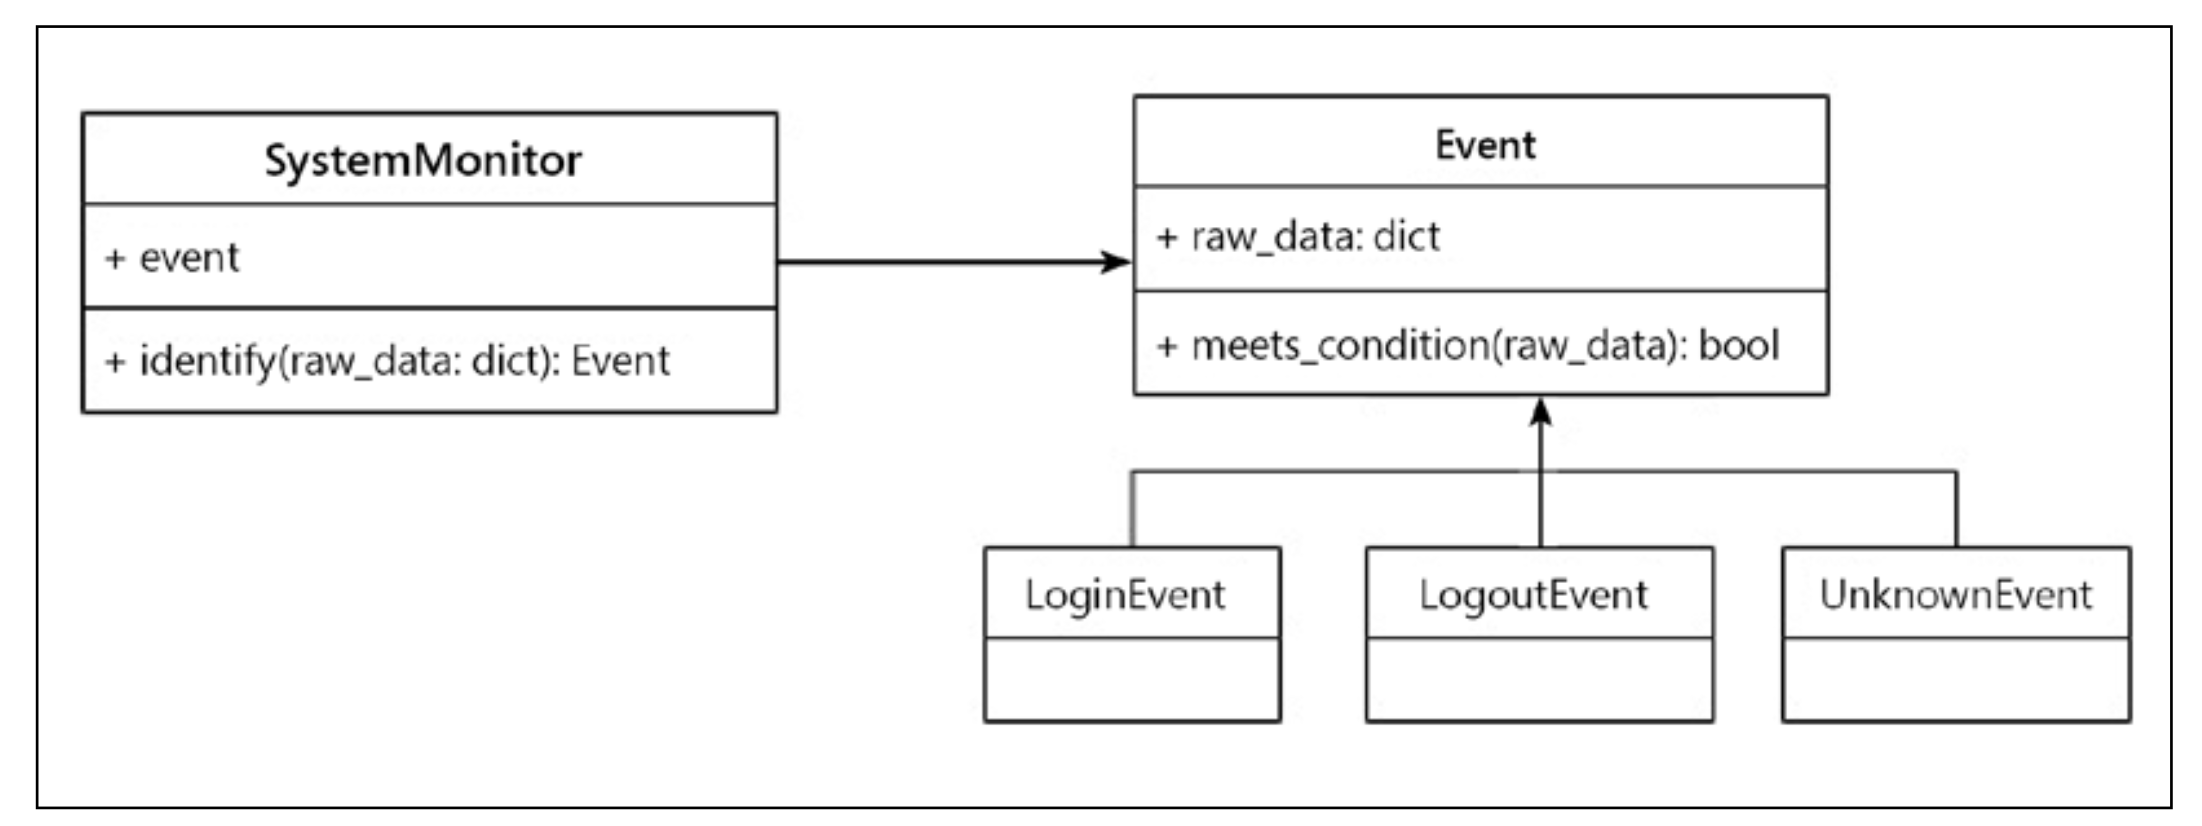

In [1]:
class EventR:
    def __init__(self, raw_data):
        self.raw_data = raw_data
    @staticmethod
    def meets_condition(event_data: dict) -> bool:
        return False
    
class UnknownEventR(EventR):
    """A type of event that cannot be identified from its data"""

class LoginEventR(EventR):
    @staticmethod
    def meets_condition(event_data: dict):
        return (
            event_data["before"]["session"] == 0
            and event_data["after"]["session"] == 1
        )
    
class LogoutEventR(EventR):
    @staticmethod
    def meets_condition(event_data: dict):
        return (
            event_data["before"]["session"] == 1
            and event_data["after"]["session"] == 0
        )
    
class SystemMonitorR:
    """Identify events that occurred in the system."""
    def __init__(self, event_data):
        self.event_data = event_data
    def identify_event(self):
        for event_cls in EventR.__subclasses__():
            try:
                if event_cls.meets_condition(self.event_data):
                    return event_cls(self.event_data)
            except KeyError:
                continue
        return UnknownEventR(self.event_data)

In [2]:
l1 = SystemMonitorR({"before": {"session": 0}, "after": {"session": 1}})

print(l1.identify_event().__class__.__name__)

l2 = SystemMonitorR({"before": {"session": 1}, "after": {"session": 0}})
print(l2.identify_event().__class__.__name__)

l3 = SystemMonitorR({"before": {"session": 1}, "after": {"session": 1}})
print(l3.identify_event().__class__.__name__)

LoginEventR
LogoutEventR
UnknownEventR


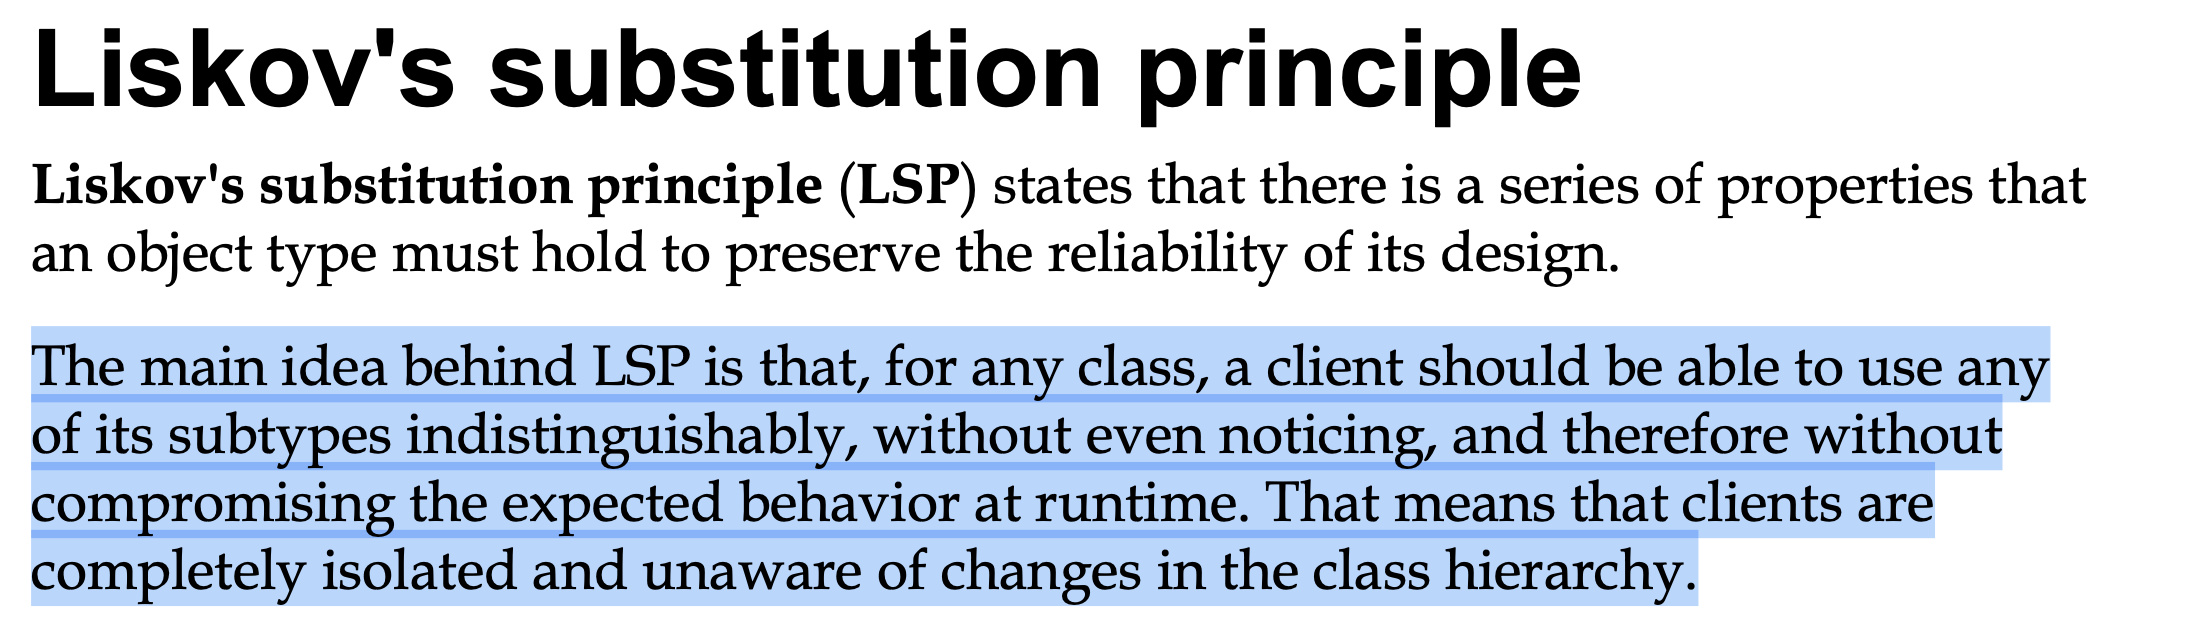

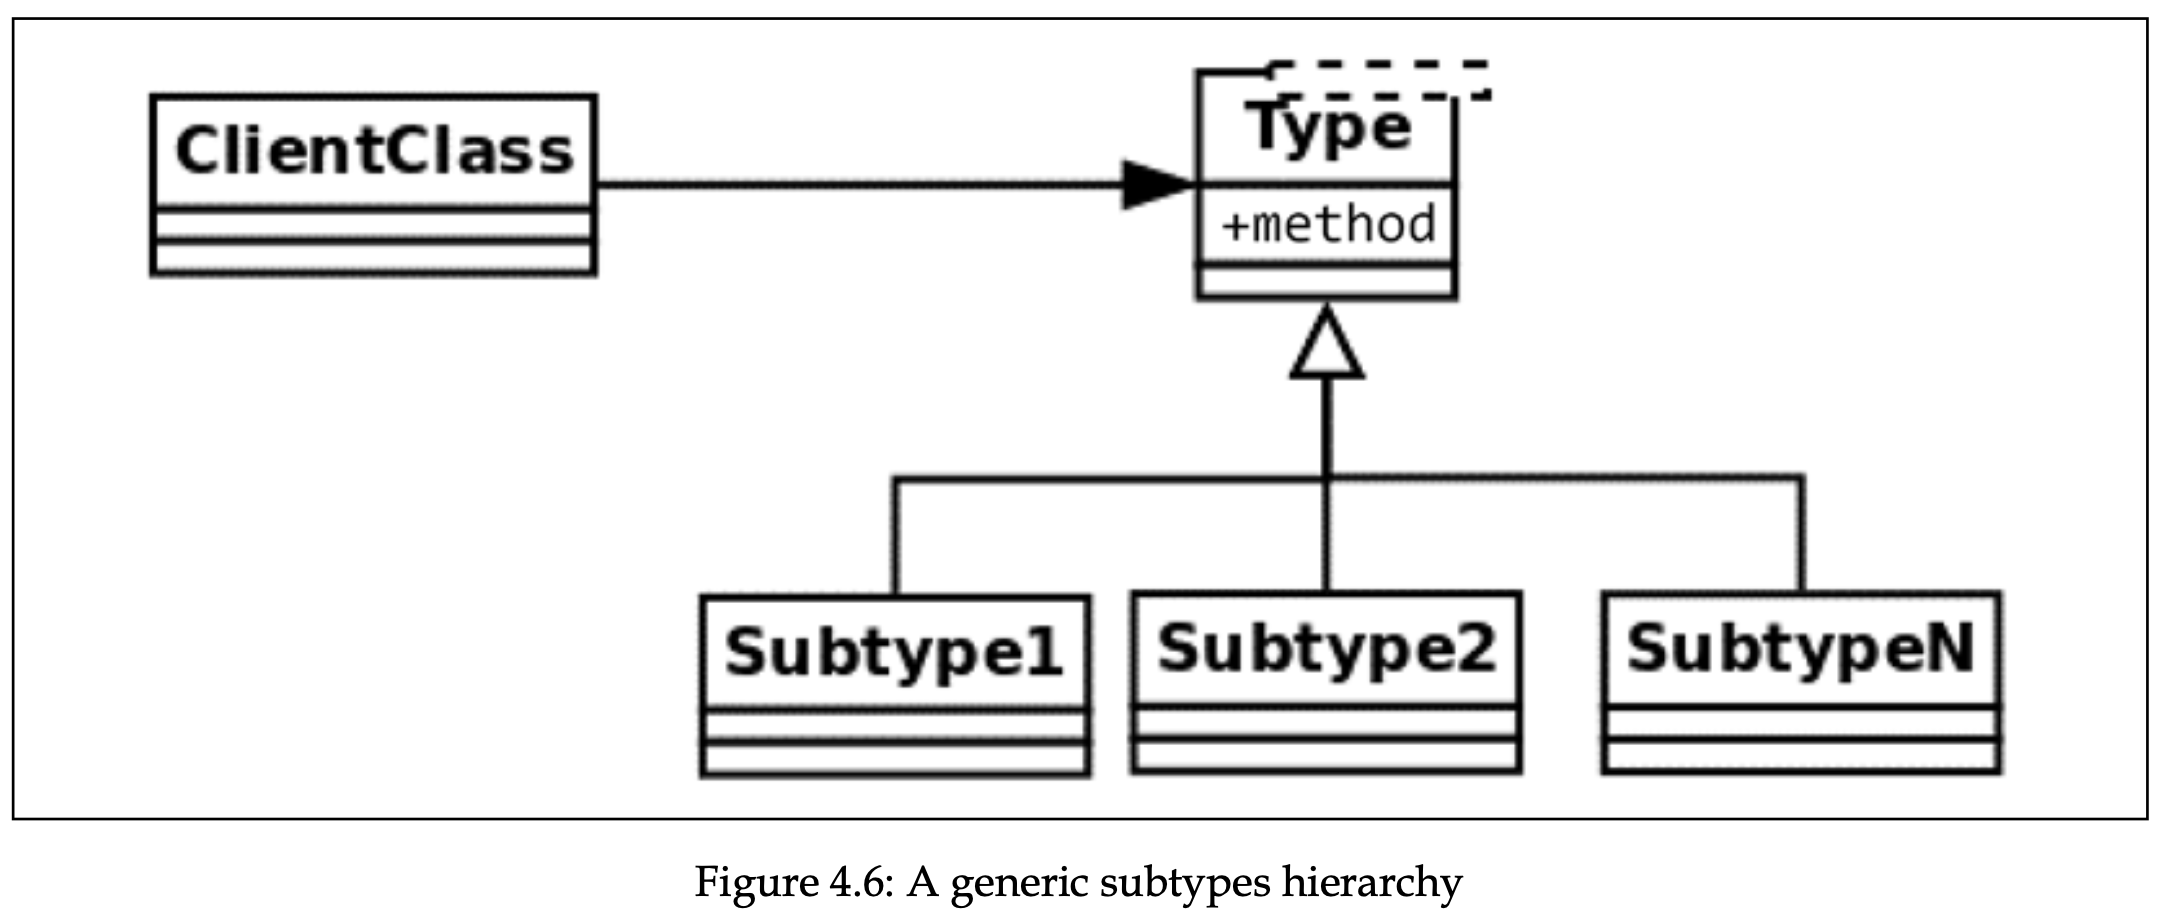

# Interface segregation principle ISP

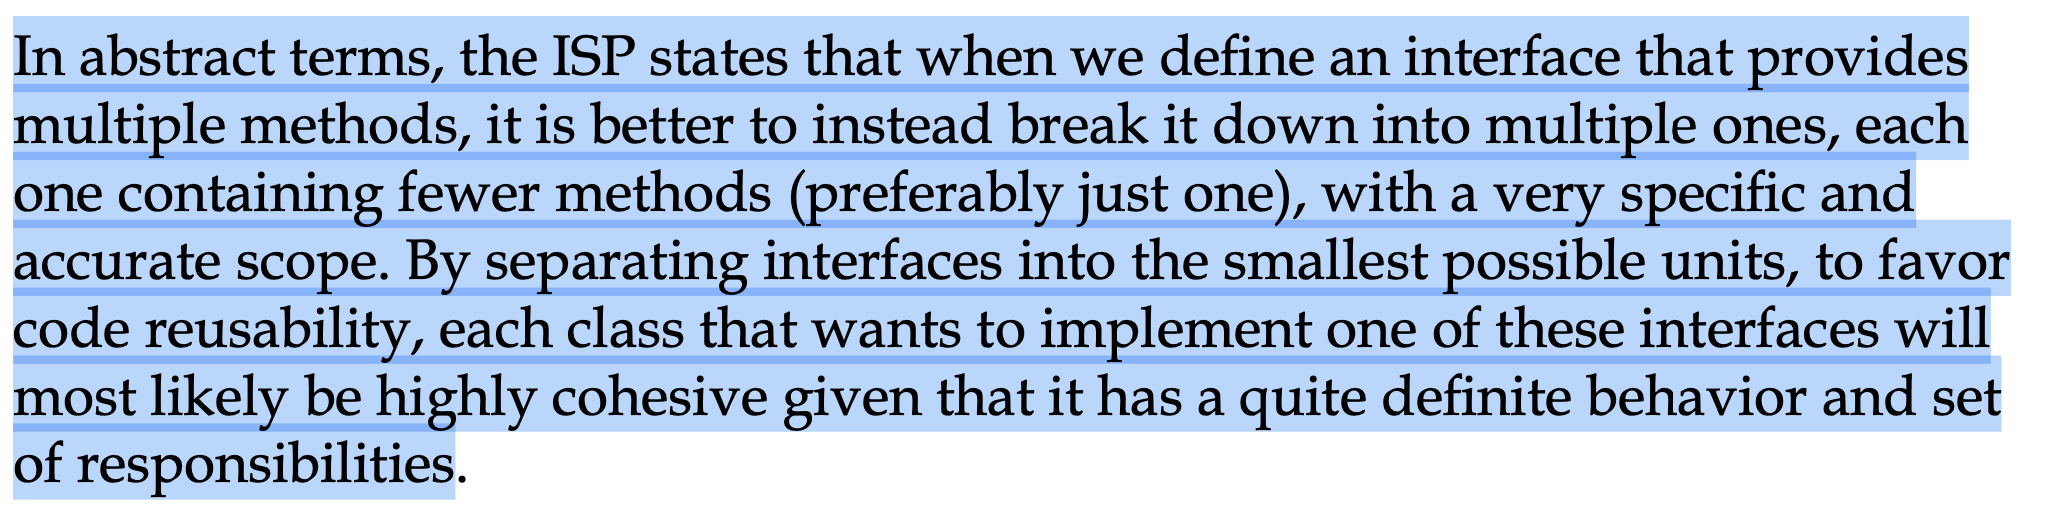

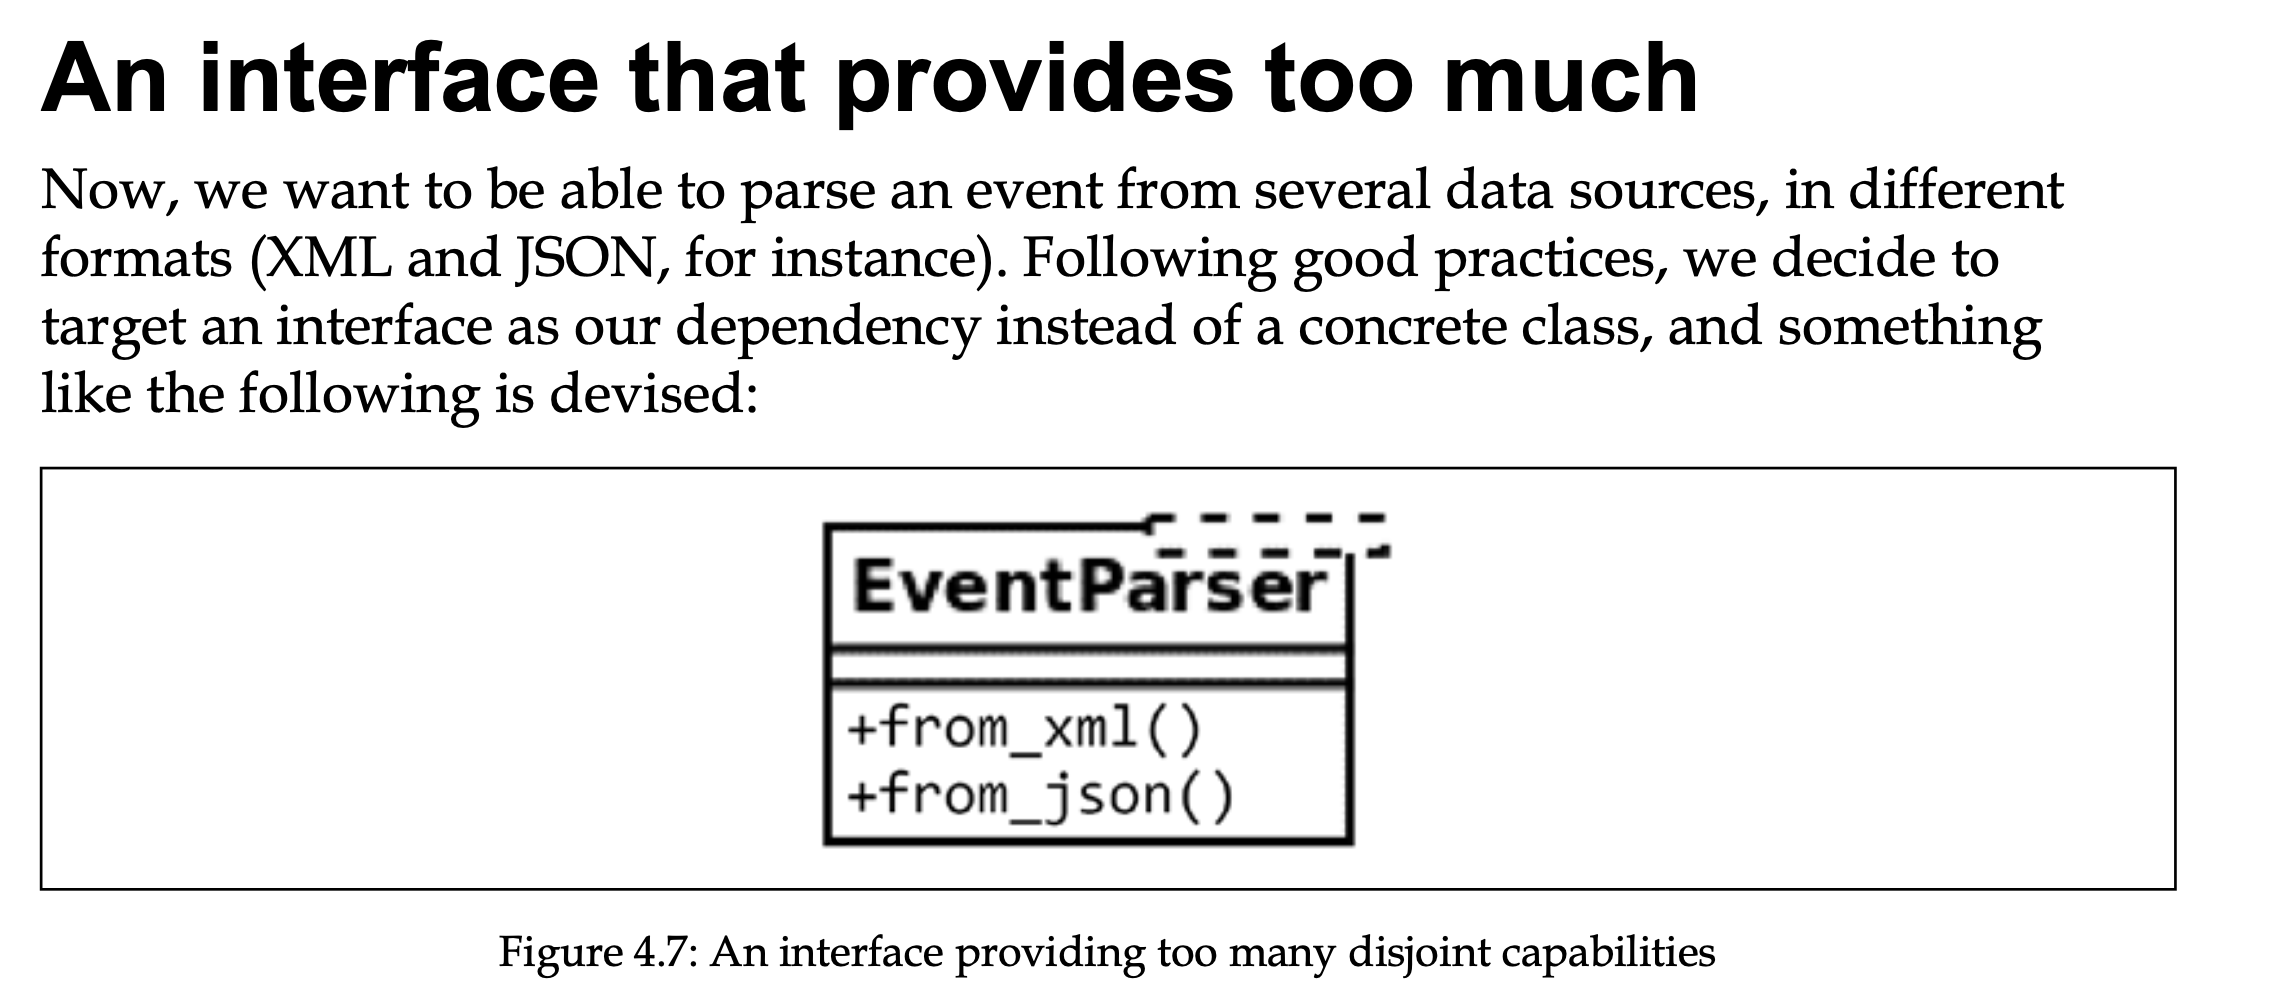

# the smaller the interface the better

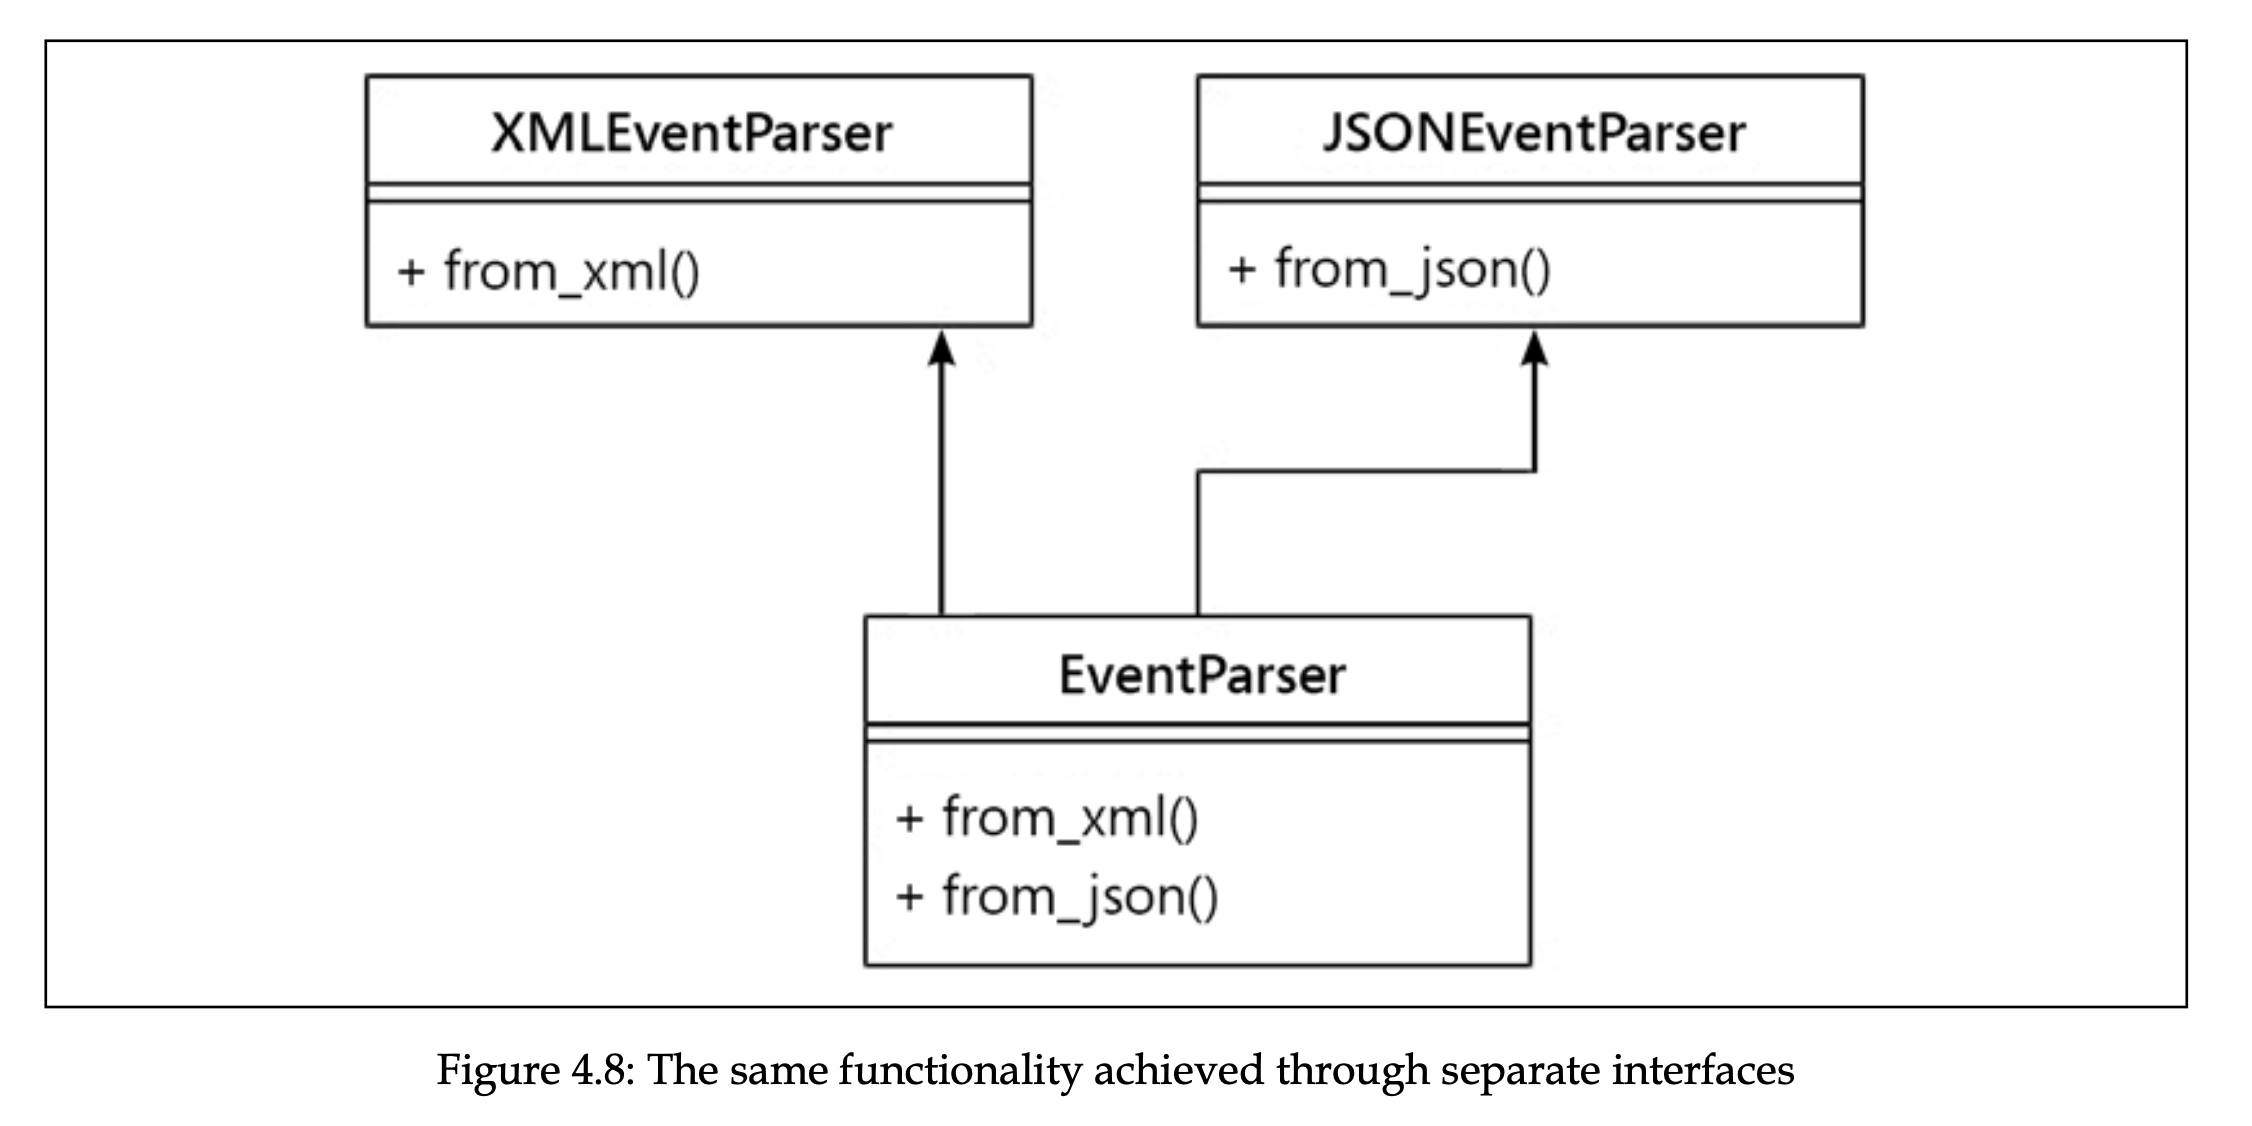

In [8]:
from abc import ABCMeta, abstractmethod

class XMLEventParser(metaclass=ABCMeta):
    @abstractmethod
    def from_xml(xml_data: str):
        """Parse an event from a source in XML representation."""

class JSONEventParser(metaclass=ABCMeta):
    @abstractmethod
    def from_json(json_data: str):
        """Parse an event from a source in JSON format."""

class EventParser(XMLEventParser, JSONEventParser):
    """An event parser that can create an event from source data either
    in XML or JSON format.
    """
    def from_xml(xml_data):
        pass
    def from_json(json_data: str):
        pass

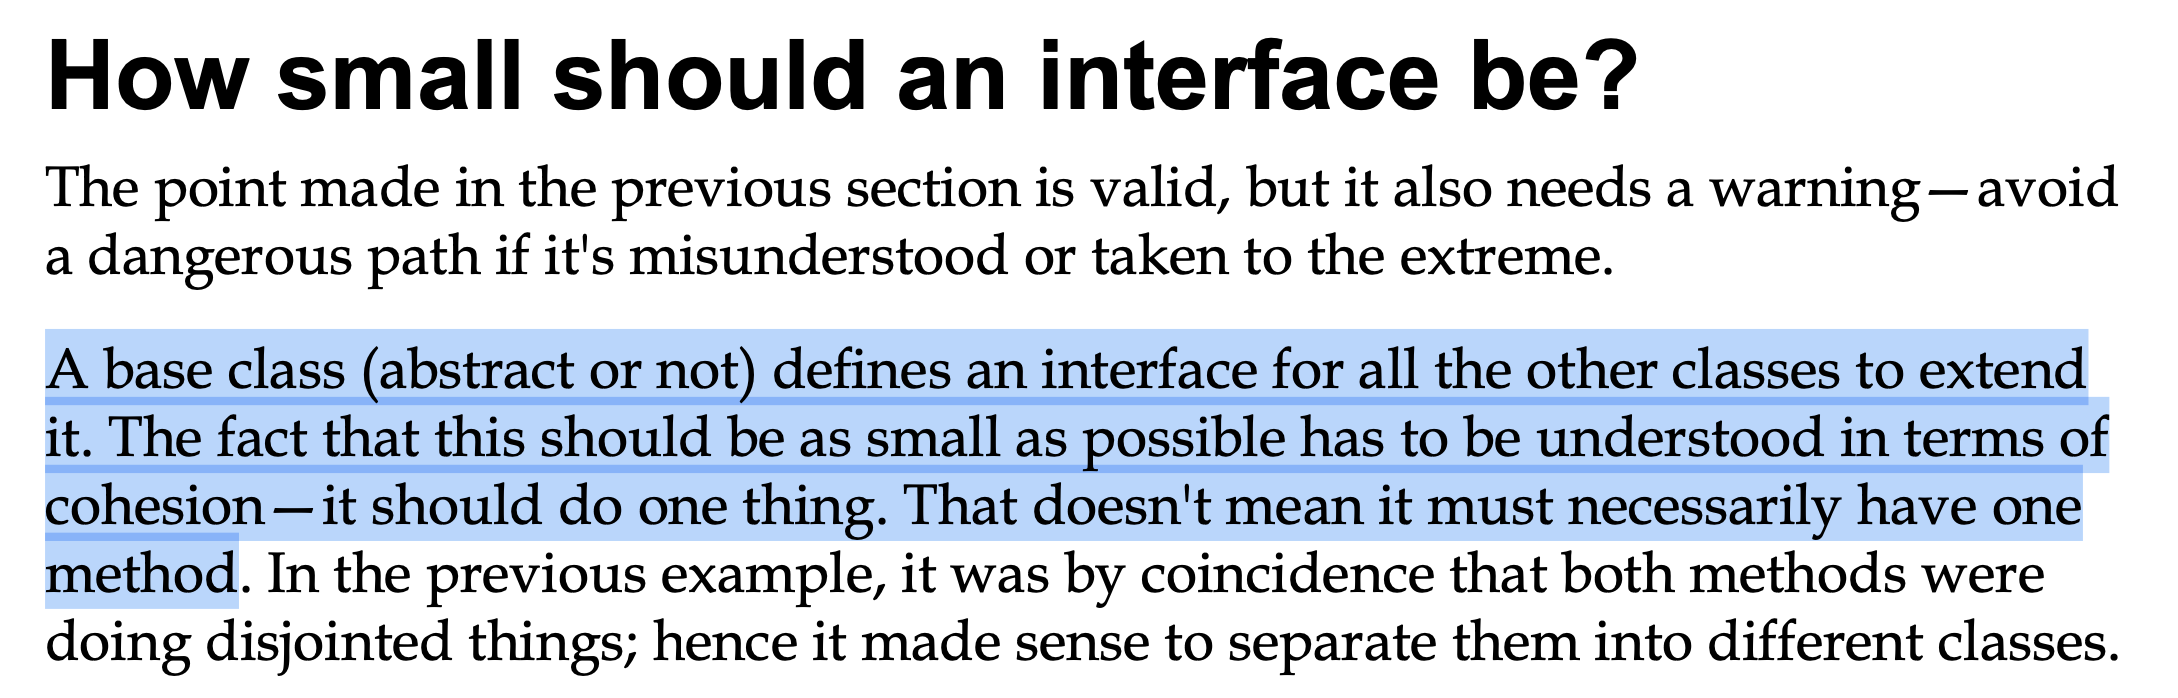